# Q2

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## part a)

Text(0.5, 1.0, 'original photo')

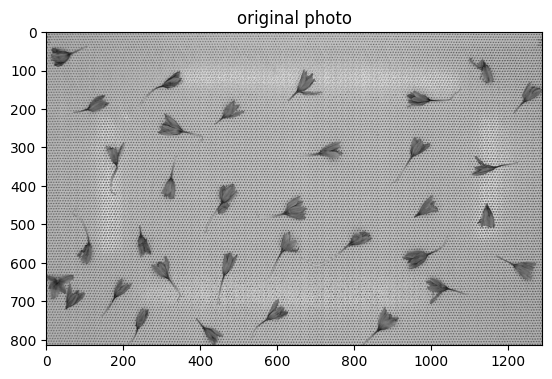

In [2]:
# reading and showing image

gray_saffrun = cv2.imread('images/saffrun.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_saffrun , cmap='gray')
plt.title('original photo')

In [3]:
# to show fourier in better visual form
def getRepresentableFourier(fourier):
    return np.log(1 + np.abs(fourier))

Text(0.5, 1.0, 'fourier space')

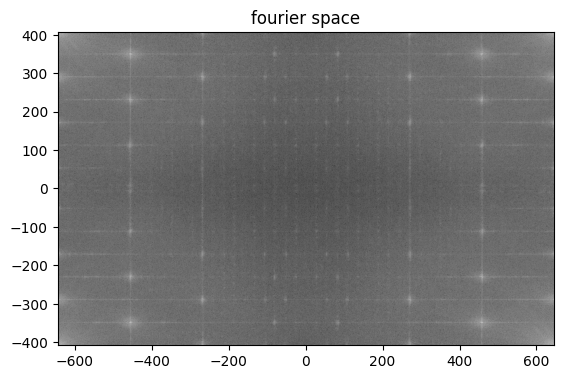

In [4]:
# transforming image to fourier space

org_height,org_width = gray_saffrun.shape

fourier = np.fft.fft2(gray_saffrun)

plt.imshow(getRepresentableFourier(fourier), cmap='gray',
          extent=(-org_width // 2, org_width // 2, -org_height // 2, org_height // 2))
plt.title('fourier space')

Text(0.5, 1.0, 'centered fourier space')

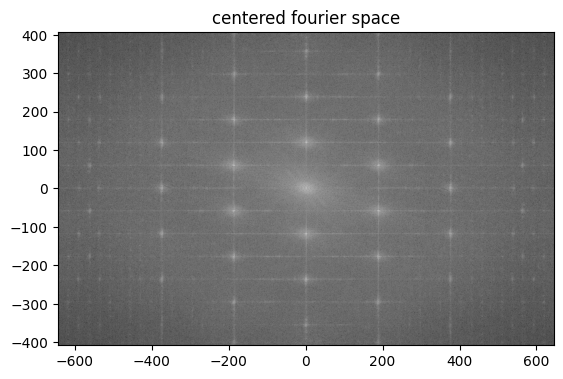

In [5]:
# shifting fourier(0,0) to center

centered_fourier =  np.fft.fftshift(fourier)


plt.imshow(getRepresentableFourier(centered_fourier), cmap='gray',
          extent=(-org_width // 2, org_width // 2, -org_height // 2, org_height // 2))
plt.title('centered fourier space')

In [6]:
# to remove noise in fourier space

def DenoisingFourier(centered_fourier,radius):

    height, width = centered_fourier.shape

    center = [int(height / 2), int(width / 2)]
    
    mask = np.zeros(centered_fourier.shape)
    for i in range(height):
        for j in range(width):
            if ((i - center[0]) **  2 + (j - center[1]) **  2 <= radius*radius):
                mask[i,j] = 1

    return centered_fourier * mask

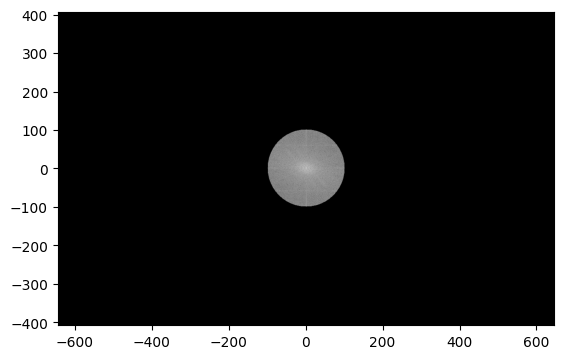

In [7]:
# generate denoised fourier

denoised_fourier = DenoisingFourier(centered_fourier,100)


plt.imshow(getRepresentableFourier(denoised_fourier), cmap='gray',
          extent=(-org_width // 2, org_width // 2, -org_height // 2, org_height // 2))

Text(0.5, 1.0, 'denoised image')

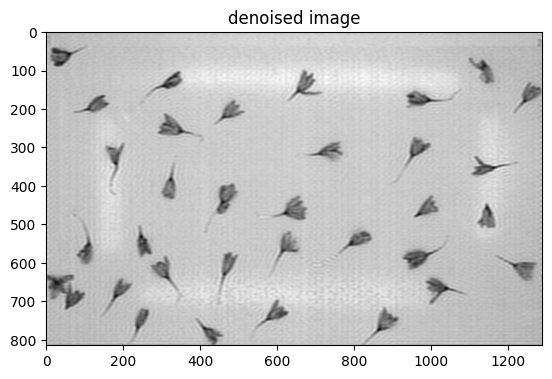

In [8]:
# generate denoised photo

shifted_back_fourier = np.fft.ifftshift(denoised_fourier) # shifting back fourier

denoised_image = np.real(np.fft.ifft2(shifted_back_fourier)) # transform fourier space to image space

plt.imshow(denoised_image , cmap='gray')
plt.title('denoised image')

## part b)

Text(0.5, 1.0, 'edges')

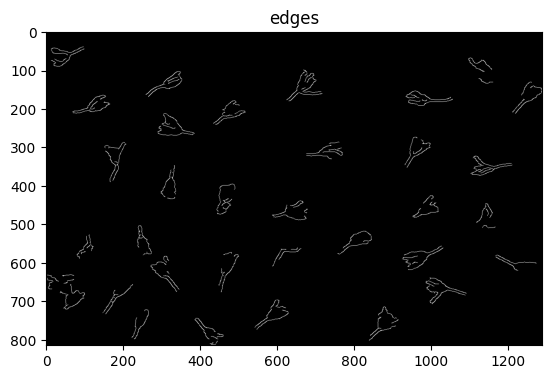

In [9]:
# apply canny

canny_res = cv2.Canny(np.uint8(denoised_image), 50, 120)

plt.imshow(canny_res , cmap='gray')
plt.title('edges')

## part c)

In [10]:
# write convolution function
def convolve(matrix, kernel):

  # return signal.convolve2d(matrix, kernel, mode='full')
  image_height, image_width = matrix.shape
  kernel_height, kernel_width = kernel.shape

  kernel = np.flipud(np.fliplr(kernel)) #rotate kernel 180 degrees

  # pad the image with zeros
  pad_height = kernel_height // 2
  pad_width = kernel_width // 2
  padded_image = np.pad(matrix, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')


  output = np.zeros(matrix.shape)

  k=0
  for i in range(pad_height ,image_height + pad_height):
    m=0 
    for j in range(pad_width ,image_width + pad_width): 
      window = padded_image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
      output[k,m] = np.sum(np.multiply(window , kernel))
      m+=1
    k+=1 
  return output

In [11]:
# generate horizontal and vertical kernels
sobel_h = np.array([[-1,0,-1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_v = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

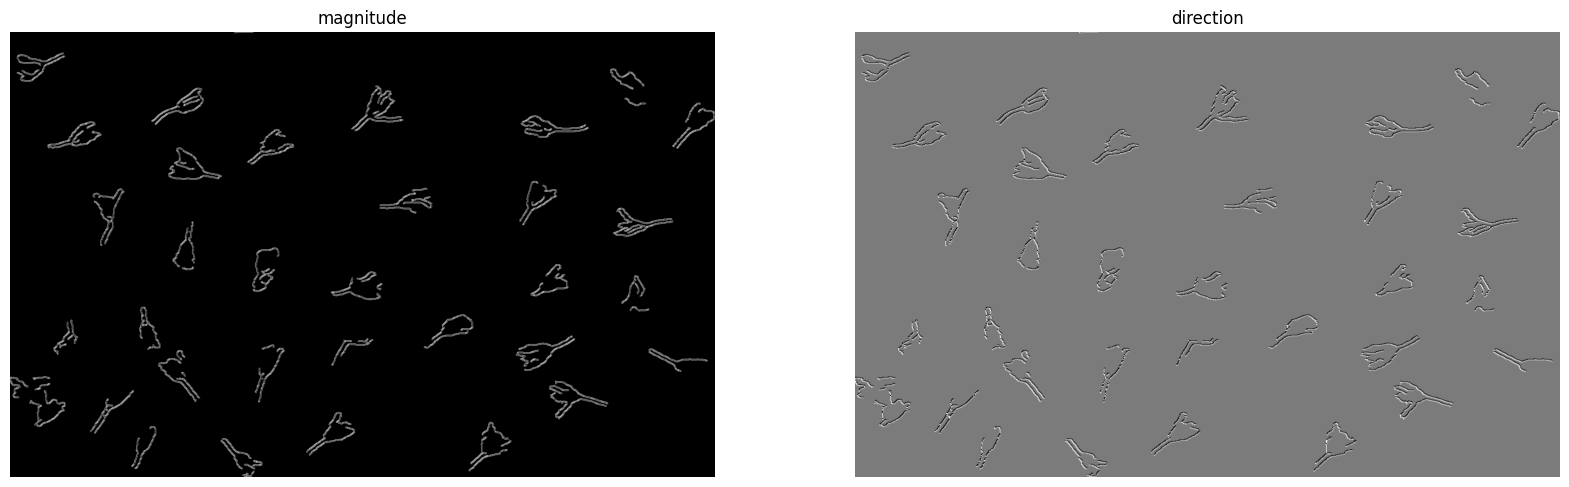

In [12]:
# getting magnitude and direction of gradient

g_h = convolve(canny_res,sobel_h)
g_v = convolve(canny_res,sobel_v)
magnitude = np.sqrt(g_h*g_h + g_v*g_v)
direction = np.arctan2(g_v,g_h)

array = [magnitude,direction]
titles = ['magnitude', 'direction']

plt.figure(figsize=(20,20))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis('off')